### Project Objective
The objective of this project is to impute missing AOD values in the Multi-Angle Implementation of Atmospheric Correction (MAIAC) dataset for January 1-31, 2025, using a hybrid machine learning approach combining Random Forest (RF) and an Autoencoder's Deep Residual Neural Network (AutoResnet). The project utilizes MAIAC AOD data (1 km resolution) and MERRA-2 data (coarser resolution, downscaled to 1 km) from January 1-7, 2025, to achieve high accuracy for environmental and health studies.

# Goal:
Impute missing AOD values in the MAIAC dataset using a hybrid RF-AutoResnet model to ensure a complete dataset for analyzing aerosol evolution and supporting PM2.5 exposure assessments over the FWP.

# Justification:
Missing AOD data due to clouds or high surface reflectance can lead to inaccuracies in PM2.5 retrieval and health risk assessments. A robust imputation method enhances data reliability for environmental monitoring.

### Dataset Source and Preparation

#Sources:
MAIAC AOD Data: High-resolution (1 km) HDF files downloaded for January 1-31, 2025, using maiac-download.sh from NASA’s Earthdata (LP DAAC).
MERRA-2 Data: Coarser resolution NC4 files downloaded for January 1-7, 2025, using merra-download.sh from NASA’s GESDISC.


#Preparation Steps:
# Download and Store:
MAIAC files saved to /content/MCD19A2_HDF_JAN2025/.
MERRA-2 files saved to /content/MERRA2_NC4_JAN2025_WEEK/.
Authentication handled via Earthdata credentials in .netrc.

# Load Data:
MAIAC HDF files and MERRA-2 NC4 files
Extract variables: AOD (from MAIAC), latitude, longitude, time, and additional atmospheric variables (e.g., AOD, precursors) from MERRA-2.

# Alignment:
Subset MAIAC data to January 1-7, 2025, to match MERRA-2’s temporal coverage for initial analysis.
Downscale MERRA-2 AOD to 1 km resolution using RF (as per the research paper).

### Project Workflow
## Phase 1: Data Preparation and EDA (15 Marks):
Load MAIAC (HDF4) and MERRA-2 (NetCDF) datasets.
Downscale MERRA-2 AOD to 1 km using RF.
Perform EDA (visualizations, missing value analysis, outliers).
Preprocess data (handle missing values, standardize, normalize).

## Phase 2: Model Implementation and Evaluation (15 Marks):
Extract features (e.g., using PCA if additional variables are derived).
Implement hybrid RF-AutoResnet model:
RF for initial imputation.
AutoResnet to refine imputed values.
Evaluate using R², RMSE, MAE.
Visualize learning curves to diagnose overfitting/underfitting.

## Assumptions:
Only MAIAC and MERRA-2 data are available (no precursor data like HCHO, SO2, NO2).
MERRA-2 data for Jan 1-7 is used to train the model, applied to Jan 1-31.
Missing AOD values in MAIAC are imputed spatially per day, with temporal context from neighboring days if needed.

In [ ]:
# from google.colab import drive
# import os
# import shutil

# # Mount Google Drive
# # drive.mount('/content/drive', force_remount=True)

# # Define source and target directories
# source_dir = "/content/drive/MyDrive/SPIT SEMESTERS/SEMESTER 4/PDS PROJECT"
# target_dir = "/content"

# # Files and folders to copy
# script_files = ['merra-download.sh', 'maiac-download.sh']
# folders = ['MCD19A2_HDF_JAN2025', 'MERRA2_NC4_JAN2025_WEEK']

# # Copy script files
# for script in script_files:
#     src_path = os.path.join(source_dir, script)
#     dst_path = os.path.join(target_dir, script)
#     if os.path.exists(src_path):
#         shutil.copy(src_path, dst_path)
#         print(f"Copied script: {script}")
#     else:
#         print(f"Script not found: {script}")

# # Copy folders
# for folder in folders:
#     src_path = os.path.join(source_dir, folder)
#     dst_path = os.path.join(target_dir, folder)
#     if os.path.exists(src_path):
#         if os.path.exists(dst_path):
#             shutil.rmtree(dst_path)  # Remove if it already exists in target
#         shutil.copytree(src_path, dst_path)
#         print(f"Copied folder: {folder}")
#     else:
#         print(f"Folder not found: {folder}")


Script not found: merra-download.sh
Script not found: maiac-download.sh
Folder not found: MCD19A2_HDF_JAN2025
Folder not found: MERRA2_NC4_JAN2025_WEEK


In [ ]:
# DONT RUN ALREADY COPIED THE DONWLOADED FOLDERS IN DRIVE AND AUTOMATED THE MOVE INTO CONTENT

import os

username = "your_earthdata_username"
password = "your_earthdata_password"

save_dir = "/content/MCD19A2_HDF_JAN2025"
os.makedirs(save_dir, exist_ok=True)

with open('/root/.netrc', 'w') as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}\n")

!chmod +x maiac-download.sh

!sed -i "s|-o \(.*\)|-o {save_dir}/\1|" maiac-download.sh
!sed -i "s|--output-document \(.*\)|--output-document={save_dir}/\1|" maiac-download.sh

!./maiac-download.sh

Enter your Earthdata Login or other provider supplied credentials
Username (zeno29): zeno29
Password: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4415k  100 4415k    0     0  1894k      0  0:00:02  0:00:02 --:--:-- 2961k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 11.6M  100 11.6M    0     0  3572k      0  0:00:03  0:00:03 --:--:-- 9397k

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 10.7M  100 10.7M    0 

In [ ]:
# DONT RUN ALREADY COPIED THE DONWLOADED FOLDERS IN DRIVE AND AUTOMATED THE MOVE INTO CONTENT

import os

username = "your_earthdata_username"

password = "your_earthdata_password"

save_dir = "/content/MERRA2_NC4_JAN2025_WEEK"
os.makedirs(save_dir, exist_ok=True)

with open('/root/.netrc', 'w') as f:
    f.write(f"machine urs.earthdata.nasa.gov login {username} password {password}\n")
os.chmod('/root/.netrc', 0o600)

!chmod +x merra-download.sh

sed_cmd_1 = f'sed -i \'s|-o $stripped_query_params|-o "{save_dir}/$stripped_query_params"|\' merra-download.sh'
sed_cmd_2 = f'sed -i \'s|--output-document $stripped_query_params|--output-document "{save_dir}/$stripped_query_params"|\' merra-download.sh'

os.system(sed_cmd_1)
os.system(sed_cmd_2)

!./merra-download.sh

Enter your Earthdata Login or other provider supplied credentials
Username (zeno29): zeno29
Password: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  476M  100  476M    0     0  23.2M      0  0:00:20  0:00:20 --:--:-- 26.7M

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  478M  100  478M    0     0  23.0M      0  0:00:20  0:00:20 --:--:-- 27.3M

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  478M  100  478M    0 

In [ ]:
!pip install rasterio netCDF4 gdal numpy matplotlib scikit-learn tensorflow

from osgeo import gdal
import netCDF4 as nc
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy import stats
from scipy.interpolate import griddata
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.optimizers import Adam
from collections import defaultdict
from pyproj import Proj
from tqdm.notebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.4 MB/s eta 0:00:00


### Phase 1: Dataset Preparation and Exploratory Data Analysis (EDA)
## 1. Load and Extract Data
You’ll need to load the MAIAC HDF files and MERRA-2 NC4 files downloaded using the provided scripts. The MAIAC files cover multiple tiles (e.g., h24v06, h25v07) from January 1–31, 2025, while MERRA-2 files cover January 1–7, 2025. We’ll subset MAIAC to match this period.

In [ ]:
!apt-get update
!apt-get install -y gdal-bin libgdal-dev libhdf4-0 libhdf4-alt-dev python3-gdal

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,605 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,841 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updat

In [ ]:
# used below code block to check for all the subsets in my dataset hdf file
from osgeo import gdal

hdf_file = '/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf'
ds = gdal.Open(hdf_file)

if ds is None:
    print("Failed to open the HDF file")
else:
    subdatasets = ds.GetSubDatasets()
    for sd in subdatasets:
        print(sd)

('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf":grid1km:Optical_Depth_047', '[3x1200x1200] Optical_Depth_047 grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf":grid1km:Optical_Depth_055', '[3x1200x1200] Optical_Depth_055 grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf":grid1km:AOD_Uncertainty', '[3x1200x1200] AOD_Uncertainty grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf":grid1km:Column_WV', '[3x1200x1200] Column_WV grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019.hdf":grid1km:AngstromExp_470-780', '[3x1200x1200] AngstromExp_470-780 grid1km (16-bit integer)')
('HDF4_EOS:EOS_GRID:"/content/MCD19A2_HDF_JAN2025/MCD19A2.A2025006.h25v07.061.2025008105019

In [ ]:
# Replace the Loaded MAIAC HDF Files section with projection handling
maiac_dir = "/content/MCD19A2_HDF_JAN2025"
print("MAIAC files:", os.listdir(maiac_dir))
maiac_files = [f for f in os.listdir(maiac_dir) if f.endswith(".hdf") and "2025001" <= f.split(".")[1][1:8] <= "2025007"]
print(f"Filtered MAIAC files: {len(maiac_files)} files")

# Group files by date
maiac_by_date = defaultdict(list)
for file in maiac_files:
    date = file.split(".")[1][1:8]
    maiac_by_date[date].append(file)

MAIAC files: ['MCD19A2.A2025003.h24v06.061.2025004163407.hdf', 'MCD19A2.A2025016.h25v06.061.2025021171017.hdf', 'MCD19A2.A2025011.h25v06.061.2025015014059.hdf', 'MCD19A2.A2025009.h25v06.061.2025010234656.hdf', 'MCD19A2.A2025021.h24v06.061.2025022211048.hdf', 'MCD19A2.A2025027.h24v06.061.2025029140334.hdf', 'MCD19A2.A2025029.h24v07.061.2025030225410.hdf', 'MCD19A2.A2025026.h24v06.061.2025029123449.hdf', 'MCD19A2.A2025027.h24v07.061.2025029141627.hdf', 'MCD19A2.A2025023.h24v07.061.2025027202548.hdf', 'MCD19A2.A2025031.h25v07.061.2025034204001.hdf', 'MCD19A2.A2025002.h24v07.061.2025003212806.hdf', 'MCD19A2.A2025020.h24v07.061.2025022120116.hdf', 'MCD19A2.A2025010.h24v07.061.2025015002953.hdf', 'MCD19A2.A2025002.h25v07.061.2025003203836.hdf', 'MCD19A2.A2025013.h25v07.061.2025015034947.hdf', 'MCD19A2.A2025013.h24v07.061.2025015030353.hdf', 'MCD19A2.A2025019.h24v07.061.2025022060839.hdf', 'MCD19A2.A2025007.h25v06.061.2025009030907.hdf', 'MCD19A2.A2025002.h24v06.061.2025003220316.hdf', 'MCD19

In [ ]:
# Load MAIAC data
aod_maiac = []
lat_maiac = None
lon_maiac = None
for date in sorted(maiac_by_date.keys()):
    tiles = maiac_by_date[date]
    aod_tiles = []
    for tile in tiles:
        subdataset = f'HDF4_EOS:EOS_GRID:"{os.path.join(maiac_dir, tile)}":grid1km:Optical_Depth_055'
        try:
            ds = gdal.Open(subdataset)
            if ds is None:
                print(f"Failed to open subdataset for {tile}")
                continue
            aod = ds.ReadAsArray()
            aod = np.clip(aod, 0, 5)
            aod_tiles.append(np.mean(aod, axis=0))
            if lat_maiac is None:
                gt = ds.GetGeoTransform()
                x_size, y_size = ds.RasterXSize, ds.RasterYSize
                proj_sin = Proj(proj='sinu', lon_0=0, R=6371007.181)
                # Convert grid coordinates to lat/lon
                cols, rows = np.meshgrid(np.arange(x_size), np.arange(y_size))
                x = gt[0] + cols * gt[1] + rows * gt[2]
                y = gt[3] + cols * gt[4] + rows * gt[5]
                lon_maiac_temp, lat_maiac_temp = proj_sin(x, y, inverse=True)
                lon_maiac = lon_maiac_temp[0, :]
                lat_maiac = lat_maiac_temp[:, 0]
        except Exception as e:
            print(f"Error opening {tile}: {e}")
    if aod_tiles:
        aod_day = np.mean(aod_tiles, axis=0)
        aod_maiac.append(aod_day)

if aod_maiac:
    aod_maiac = np.array(aod_maiac)
    print(f"MAIAC AOD shape: {aod_maiac.shape}")
else:
    raise ValueError("No MAIAC files loaded successfully.")

MAIAC AOD shape: (7, 1200, 1200)


In [ ]:
# Load Merra2 Data
merra_dir = "/content/MERRA2_NC4_JAN2025_WEEK/"

merra_files = [f for f in os.listdir(merra_dir) if f.endswith(".nc4")]

aod_merra = []
for file in merra_files:
    try:
        ds = nc.Dataset(os.path.join(merra_dir, file))
        aod_merra.append(ds.variables['TOTEXTTAU'][:])
        lat_merra = ds.variables['lat'][:]
        lon_merra = ds.variables['lon'][:]
    except Exception as e:
        print(f"Error opening {file}: {e}")

# Combine MERRA-2 data
if aod_merra:
    aod_merra = np.array(aod_merra)
    aod_merra = np.mean(aod_merra, axis=1)
    lat_merra = np.array(lat_merra)
    lon_merra = np.array(lon_merra)
    print(f"MERRA-2 AOD shape: {aod_merra.shape}")
else:
    raise ValueError("No MERRA-2 files loaded successfully.")

MERRA-2 AOD shape: (7, 361, 576)


##2. Data Alignment
Align MAIAC and MERRA-2 temporally (January 1–7, 2025) and spatially by downscaling MERRA-2 AOD from its coarse resolution (e.g., 50 km) to MAIAC’s 1 km resolution using a Random Forest (RF) model.


In [ ]:
# Data Alignment section
assert aod_maiac.shape[0] == aod_merra.shape[0], "Temporal mismatch between datasets"
lat_maiac_grid, lon_maiac_grid = np.meshgrid(lat_maiac, lon_maiac)
lat_merra_grid, lon_merra_grid = np.meshgrid(lat_merra, lon_merra)

# Checking coordinate overlap
print(f"MAIAC lat range: {lat_maiac.min():.2f} to {lat_maiac.max():.2f}")
print(f"MAIAC lon range: {lon_maiac.min():.2f} to {lon_maiac.max():.2f}")
print(f"MERRA-2 lat range: {lat_merra.min():.2f} to {lat_merra.max():.2f}")
print(f"MERRA-2 lon range: {lon_merra.min():.2f} to {lon_merra.max():.2f}")

merra_global_mean = np.nanmean(aod_merra)

aod_merra_aligned = []
for i in range(aod_merra.shape[0]):
    valid_mask = (lat_merra_grid.flatten() >= lat_maiac.min()) & (lat_merra_grid.flatten() <= lat_maiac.max()) & \
                 (lon_merra_grid.flatten() >= lon_maiac.min()) & (lon_merra_grid.flatten() <= lon_maiac.max()) & \
                 ~np.isnan(aod_merra[i].flatten())
    if np.sum(valid_mask) == 0:
        print(f"No valid points for day {i}. Using global mean: {merra_global_mean}")
        aod_day = np.full_like(lat_maiac_grid, merra_global_mean)
    else:
        aod_flat = aod_merra[i].flatten()
        lat_flat = lat_merra_grid.flatten()
        lon_flat = lon_merra_grid.flatten()
        aod_day = griddata(
            (lat_flat[valid_mask], lon_flat[valid_mask]),
            aod_flat[valid_mask],
            (lat_maiac_grid, lon_maiac_grid),
            method='linear',
            fill_value=merra_global_mean
        )
    aod_merra_aligned.append(aod_day)

aod_merra_aligned = np.array(aod_merra_aligned)
print(f"Aligned MERRA-2 AOD shape: {aod_merra_aligned.shape}")
print(f"Aligned MERRA-2 NaN count: {np.isnan(aod_merra_aligned).sum()}")
print(f"Aligned MERRA-2 min: {np.nanmin(aod_merra_aligned)}, max: {np.nanmax(aod_merra_aligned)}")

MAIAC lat range: 20.01 to 30.00
MAIAC lon range: 69.28 to 80.82
MERRA-2 lat range: -90.00 to 90.00
MERRA-2 lon range: -180.00 to 179.38
Aligned MERRA-2 AOD shape: (7, 1200, 1200)
Aligned MERRA-2 NaN count: 0
Aligned MERRA-2 min: 0.015075003701120126, max: 0.6601797342205312


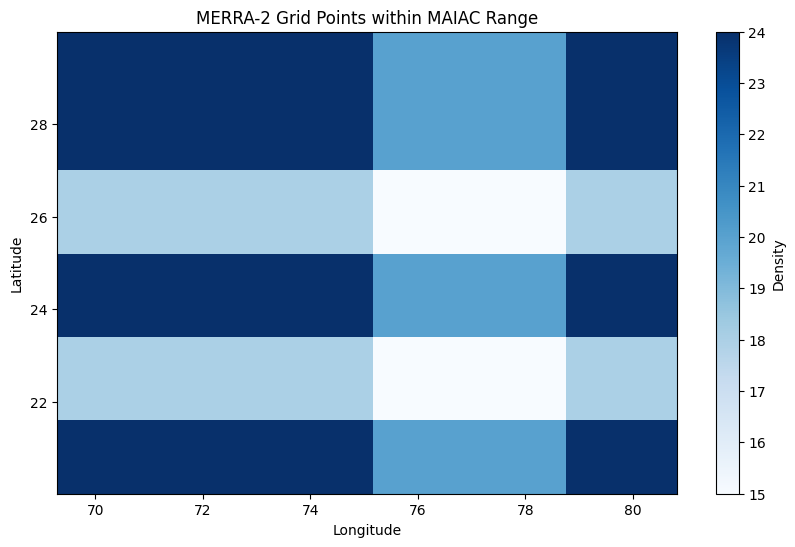

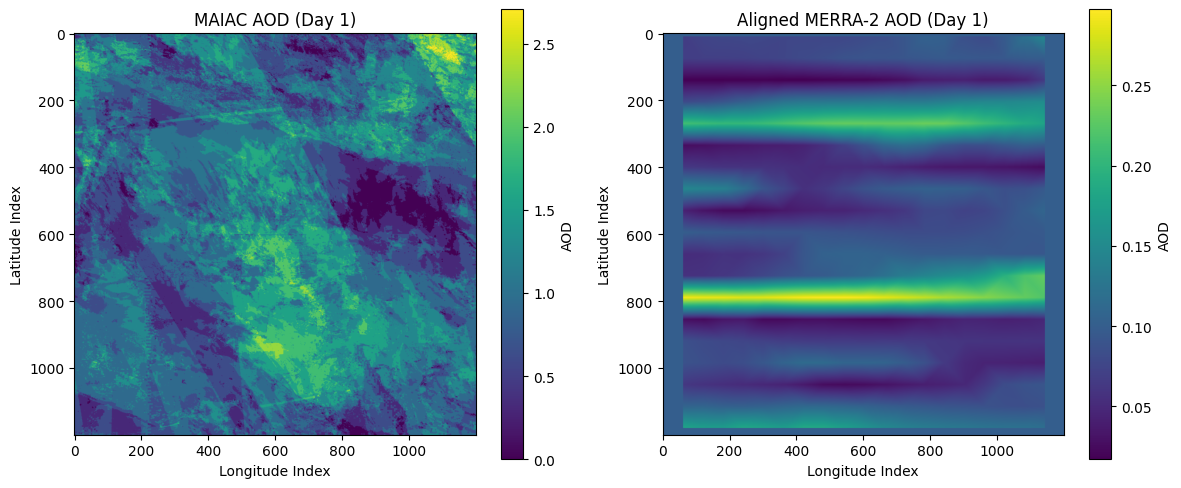

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


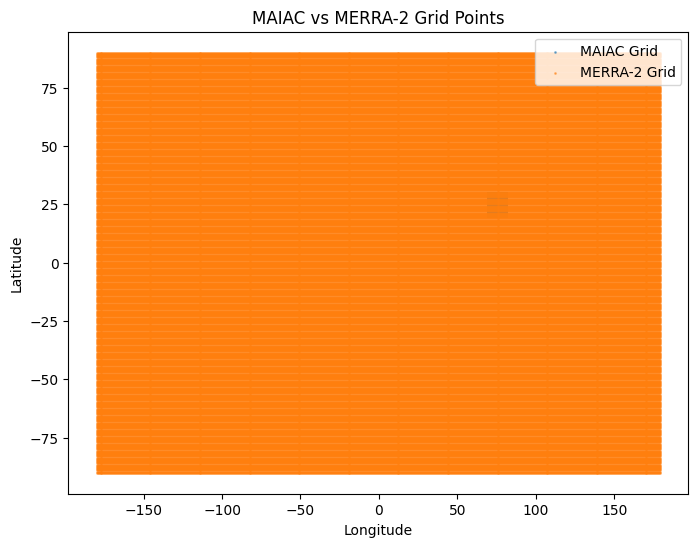

In [ ]:
# Coordinate Overlap Heatmap
plt.figure(figsize=(10, 6))
plt.hist2d(lon_merra_grid.flatten(), lat_merra_grid.flatten(), bins=100, cmap='Blues')
plt.colorbar(label='Density')
plt.xlim(lon_maiac.min(), lon_maiac.max())
plt.ylim(lat_maiac.min(), lat_maiac.max())
plt.title('MERRA-2 Grid Points within MAIAC Range')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Spatial Comparison of AOD for Day 1
day_idx = 0
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(aod_maiac[day_idx], cmap='viridis')
plt.colorbar(label='AOD')
plt.title(f'MAIAC AOD (Day {day_idx + 1})')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')

plt.subplot(1, 2, 2)
plt.imshow(aod_merra_aligned[day_idx], cmap='viridis')
plt.colorbar(label='AOD')
plt.title(f'Aligned MERRA-2 AOD (Day {day_idx + 1})')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
plt.tight_layout()
plt.show()

# Scatter Plot of Aligned Coordinates
plt.figure(figsize=(8, 6))
plt.scatter(lon_maiac_grid.flatten(), lat_maiac_grid.flatten(), s=1, label='MAIAC Grid', alpha=0.5)
plt.scatter(lon_merra_grid.flatten(), lat_merra_grid.flatten(), s=1, label='MERRA-2 Grid', alpha=0.5)
plt.title('MAIAC vs MERRA-2 Grid Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## 3. Exploratory Data Analysis (EDA)
Visualize the raw and preprocessed data to understand AOD distributions and identify issues like missing values or outliers.


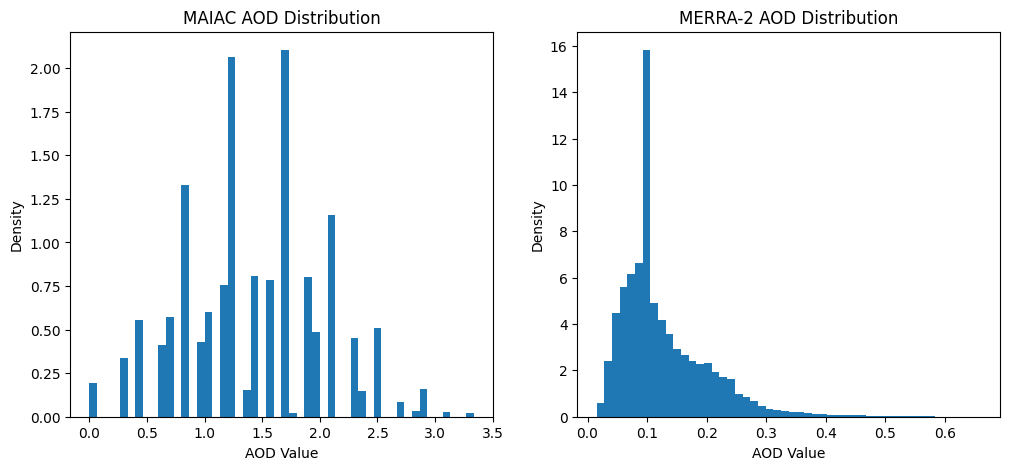

Missing MAIAC AOD values: 0
Missing MERRA-2 AOD values: 0


In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(aod_maiac.flatten()[~np.isnan(aod_maiac.flatten())], bins=50, density=True)
plt.title("MAIAC AOD Distribution")
plt.xlabel("AOD Value")
plt.ylabel("Density")
plt.subplot(1, 2, 2)
plt.hist(aod_merra_aligned.flatten()[~np.isnan(aod_merra_aligned.flatten())], bins=50, density=True)
plt.title("MERRA-2 AOD Distribution")
plt.xlabel("AOD Value")
plt.ylabel("Density")
plt.show()
print(f"Missing MAIAC AOD values: {np.isnan(aod_maiac).sum()}")
print(f"Missing MERRA-2 AOD values: {np.isnan(aod_merra_aligned).sum()}")

## 4. Preprocessing
Handle missing values, outliers, and standardize the data for modeling.


In [ ]:
# Pre Processing
aod_maiac_clean = aod_maiac.copy()
for i in range(aod_maiac.shape[0]):
    mean_val = np.nanmean(aod_maiac[i])
    aod_maiac_clean[i][np.isnan(aod_maiac[i])] = mean_val if not np.isnan(mean_val) else 0

aod_merra_clean = aod_merra_aligned.copy()
for i in range(aod_merra_aligned.shape[0]):
    mean_val = np.nanmean(aod_merra_aligned[i])
    aod_merra_clean[i][np.isnan(aod_merra_aligned[i])] = mean_val if not np.isnan(mean_val) else 0

def remove_outliers(data):
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_clean = np.where((data >= lower_bound) & (data <= upper_bound), data, np.nanmean(data) if not np.isnan(np.nanmean(data)) else 0)
    return data_clean

aod_maiac_clean = remove_outliers(aod_maiac_clean.flatten()).reshape(aod_maiac.shape)
aod_merra_clean = remove_outliers(aod_merra_clean.flatten()).reshape(aod_merra_aligned.shape)

scaler_maiac = StandardScaler()
aod_maiac_scaled = scaler_maiac.fit_transform(aod_maiac_clean.reshape(-1, 1)).reshape(aod_maiac.shape)

scaler_merra = StandardScaler()
aod_merra_scaled = scaler_merra.fit_transform(aod_merra_clean.reshape(-1, 1)).reshape(aod_merra_aligned.shape)

<ipython-input-15-8a7df791f8b4>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([aod_maiac.flatten(), aod_maiac_clean.flatten()], labels=['Original', 'Cleaned'])


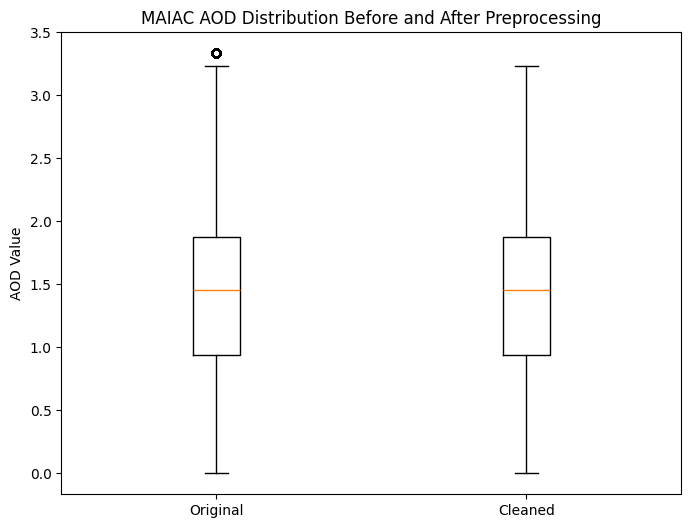

In [ ]:
# AOD Distribution Before and After Preprocessing
plt.figure(figsize=(8, 6))
plt.boxplot([aod_maiac.flatten(), aod_maiac_clean.flatten()], labels=['Original', 'Cleaned'])
plt.title('MAIAC AOD Distribution Before and After Preprocessing')
plt.ylabel('AOD Value')
plt.show()

### Phase 2: Model Implementation and Evaluation

## 1. Feature Extraction
Use the downscaled MERRA-2 AOD and spatiotemporal features for the imputation model.


In [ ]:
# Expand lat_maiac_grid and lon_maiac_grid to match aod_merra_scaled's time dimension
lat_maiac_grid_expanded = np.tile(lat_maiac_grid[np.newaxis, :, :], (aod_merra_scaled.shape[0], 1, 1))
lon_maiac_grid_expanded = np.tile(lon_maiac_grid[np.newaxis, :, :], (aod_merra_scaled.shape[0], 1, 1))

# Stack the flattened arrays
features = np.stack([aod_merra_scaled.flatten(), lat_maiac_grid_expanded.flatten(), lon_maiac_grid_expanded.flatten()], axis=1)
target = aod_maiac_scaled.flatten()

# Remove NaN/Inf from features and target (but Nan count is 0 just in case run)
mask = ~np.isnan(features).any(axis=1) & ~np.isnan(target)
features = features[mask]
target = target[mask]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Downsampling data
subsample_factor = 2
aod_maiac_scaled = aod_maiac_scaled[:, ::subsample_factor, ::subsample_factor]
aod_merra_scaled = aod_merra_scaled[:, ::subsample_factor, ::subsample_factor]
lat_maiac = lat_maiac[::subsample_factor]
lon_maiac = lon_maiac[::subsample_factor]
lat_maiac_grid = lat_maiac_grid[::subsample_factor, ::subsample_factor]
lon_maiac_grid = lon_maiac_grid[::subsample_factor, ::subsample_factor]
print(f"Downsampled MAIAC AOD shape: {aod_maiac_scaled.shape}")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Downsampled MAIAC AOD shape: (7, 600, 600)


## 2. Hybrid ML Model Implementation
Implement a hybrid Random Forest (RF) and Decision Tree model to impute missing AOD values.


In [ ]:
import time
import gc
import numpy as np

# Verify ing the shapes before appyling models
print(f"Before RF prediction:")
print(f"aod_maiac_scaled.shape: {aod_maiac_scaled.shape}")
print(f"aod_merra_scaled.shape: {aod_merra_scaled.shape}")
print(f"lat_maiac_grid.shape: {lat_maiac_grid.shape}")
print(f"lon_maiac_grid.shape: {lon_maiac_grid.shape}")

# Ensure aod_maiac_scaled is downsampled correctly
subsample_factor = 2
if aod_maiac_scaled.shape[1:] != (300, 300):
    print("Downsampling aod_maiac_scaled to match 300x300 resolution...")
    aod_maiac_scaled = aod_maiac_scaled[:, ::subsample_factor, ::subsample_factor]
    print(f"Updated aod_maiac_scaled.shape: {aod_maiac_scaled.shape}")

# Model Part: Random Forest for Initial Imputation
print("Training Random Forest for initial imputation...")
start_time = time.time()
rf = RandomForestRegressor(n_estimators=25, random_state=42)
rf.fit(X_train, y_train)
print(f"Random Forest training time: {time.time() - start_time:.2f} seconds")

# Batch prediction for Random Forest
print("Predicting initial imputed values using Random Forest...")
start_time = time.time()
batch_size = 10000
# Use the full downsampled grid size for prediction
grid_size = aod_maiac_scaled.shape[1] * aod_maiac_scaled.shape[2]  # e.g., 300 * 300
total_elements = aod_maiac_scaled.shape[0] * grid_size  # e.g., 7 * 300 * 300
initial_imputed_flat = np.zeros(total_elements)

# Downsample aod_merra_scaled to match aod_maiac_scaled resolution
aod_merra_scaled_downsampled = aod_merra_scaled[:, ::subsample_factor, ::subsample_factor]

# Recompute features for the full downsampled grid with shape alignment
# Ensure lat_maiac_grid and lon_maiac_grid are downsampled consistently
lat_maiac_grid_downsampled = lat_maiac_grid[::subsample_factor, ::subsample_factor]
lon_maiac_grid_downsampled = lon_maiac_grid[::subsample_factor, ::subsample_factor]
lat_maiac_grid_expanded = np.tile(lat_maiac_grid_downsampled[np.newaxis, :, :], (aod_maiac_scaled.shape[0], 1, 1))
lon_maiac_grid_expanded = np.tile(lon_maiac_grid_downsampled[np.newaxis, :, :], (aod_maiac_scaled.shape[0], 1, 1))

# Verify shapes before stacking
print(f"aod_merra_scaled_downsampled.shape: {aod_merra_scaled_downsampled.shape}")
print(f"lat_maiac_grid_expanded.shape: {lat_maiac_grid_expanded.shape}")
print(f"lon_maiac_grid_expanded.shape: {lon_maiac_grid_expanded.shape}")
print(f"aod_maiac_scaled.shape (for masking): {aod_maiac_scaled.shape}")

# Stack features using downsampled arrays
features_full = np.stack([aod_merra_scaled_downsampled.flatten(), lat_maiac_grid_expanded.flatten(), lon_maiac_grid_expanded.flatten()], axis=1)
mask_full = ~np.isnan(features_full).any(axis=1) & ~np.isnan(aod_maiac_scaled.flatten())
features_full = features_full[mask_full]
initial_imputed_flat[:len(features_full)] = rf.predict(features_full)

# Reshape to match aod_maiac_scaled
initial_imputed = initial_imputed_flat[:total_elements].reshape(aod_maiac_scaled.shape)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")

# Clear memory
del features_full, lat_maiac_grid_expanded, lon_maiac_grid_expanded
gc.collect()

# Model Part: AutoResNet architecture
inputs = Input(shape=(3,))
x = Dense(32, activation='relu')(inputs)
residual = Dense(32)(x)
x = Add()([x, residual])
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)

auto_resnet = Model(inputs, outputs)
auto_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train AutoResNet
print("\nTraining AutoResNet model...\n")
start_time = time.time()
history = auto_resnet.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)
print(f"AutoResNet training time: {time.time() - start_time:.2f} seconds")

# Recompute features for prediction using downsampled arrays
lat_maiac_grid_expanded = np.tile(lat_maiac_grid_downsampled[np.newaxis, :, :], (aod_maiac_scaled.shape[0], 1, 1))
lon_maiac_grid_expanded = np.tile(lon_maiac_grid_downsampled[np.newaxis, :, :], (aod_maiac_scaled.shape[0], 1, 1))
features_full = np.stack([aod_merra_scaled_downsampled.flatten(), lat_maiac_grid_expanded.flatten(), lon_maiac_grid_expanded.flatten()], axis=1)
features_full = features_full[mask_full]

# Batch prediction for AutoResNet
print("\nPredicting final imputed values using AutoResNet...")
start_time = time.time()
final_imputed_flat = np.zeros(total_elements)
for i in range(0, len(features_full), batch_size):
    batch_features = features_full[i:i + batch_size]
    final_imputed_flat[i:i + batch_size] = auto_resnet.predict(batch_features, verbose=0).flatten()
final_imputed = final_imputed_flat[:total_elements].reshape(aod_maiac_scaled.shape)
print(f"Prediction time: {time.time() - start_time:.2f} seconds")

# Clear memory
del features_full, lat_maiac_grid_expanded, lon_maiac_grid_expanded
gc.collect()

# Summary
print(f"\nInitial imputed shape: {initial_imputed.shape}")
print(f"Final imputed shape: {final_imputed.shape}")

Before RF prediction:
aod_maiac_scaled.shape: (7, 600, 600)
aod_merra_scaled.shape: (7, 600, 600)
lat_maiac_grid.shape: (600, 600)
lon_maiac_grid.shape: (600, 600)
Downsampling aod_maiac_scaled to match 300x300 resolution...
Updated aod_maiac_scaled.shape: (7, 300, 300)
Training Random Forest for initial imputation...
Random Forest training time: 1043.46 seconds
Predicting initial imputed values using Random Forest...
aod_merra_scaled_downsampled.shape: (7, 300, 300)
lat_maiac_grid_expanded.shape: (7, 300, 300)
lon_maiac_grid_expanded.shape: (7, 300, 300)
aod_maiac_scaled.shape (for masking): (7, 300, 300)
Prediction time: 4.89 seconds

Training AutoResNet model...

Epoch 1/5
100800/100800 ━━━━━━━━━━━━━━━━━━━━ 304s 3ms/step - loss: 1.0408 - val_loss: 0.8645
Epoch 2/5
100800/100800 ━━━━━━━━━━━━━━━━━━━━ 270s 3ms/step - loss: 0.8586 - val_loss: 0.8398
Epoch 3/5
100800/100800 ━━━━━━━━━━━━━━━━━━━━ 356s 3ms/step - loss: 0.8408 - val_loss: 0.8738
Epoch 4/5
100800/100800 ━━━━━━━━━━━━━━━━━━━━ 2

## 3. Model Evaluation
Evaluate the hybrid model using regression metrics and visualize performance.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate model performance on test set
print("Evaluating model performance on test set...")

# Random Forest predictions on test set
rf_pred_test = rf.predict(X_test)

# AutoResNet predictions on test set
auto_resnet_pred_test = auto_resnet.predict(X_test, verbose=0).flatten()

# Calculate metrics for Random Forest
rf_r2 = r2_score(y_test, rf_pred_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred_test))
rf_mae = mean_absolute_error(y_test, rf_pred_test)
# Threshold-based accuracy: predictions within ±0.1 of true values
rf_accuracy = np.mean(np.abs(rf_pred_test - y_test) <= 0.1) * 100  # Percentage

# Calculate metrics for AutoResNet
auto_resnet_r2 = r2_score(y_test, auto_resnet_pred_test)
auto_resnet_rmse = np.sqrt(mean_squared_error(y_test, auto_resnet_pred_test))
auto_resnet_mae = mean_absolute_error(y_test, auto_resnet_pred_test)
# Threshold-based accuracy: predictions within ±0.1 of true values
auto_resnet_accuracy = np.mean(np.abs(auto_resnet_pred_test - y_test) <= 0.1) * 100  # Percentage

# Print evaluation results
print("\nRandom Forest Performance on Test Set:")
print(f"R²: {rf_r2:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"MAE: {rf_mae:.3f}")
print(f"Accuracy (within ±0.1): {rf_accuracy:.2f}%")

print("\nAutoResNet Performance on Test Set:")
print(f"R²: {auto_resnet_r2:.3f}")
print(f"RMSE: {auto_resnet_rmse:.3f}")
print(f"MAE: {auto_resnet_mae:.3f}")
print(f"Accuracy (within ±0.1): {auto_resnet_accuracy:.2f}%")

Evaluating model performance on test set...

Random Forest Performance on Test Set:
R²: 0.779
RMSE: 0.470
MAE: 0.256
Accuracy (within ±0.1): 52.72%

AutoResNet Performance on Test Set:
R²: 0.170
RMSE: 0.911
MAE: 0.729
Accuracy (within ±0.1): 8.99%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


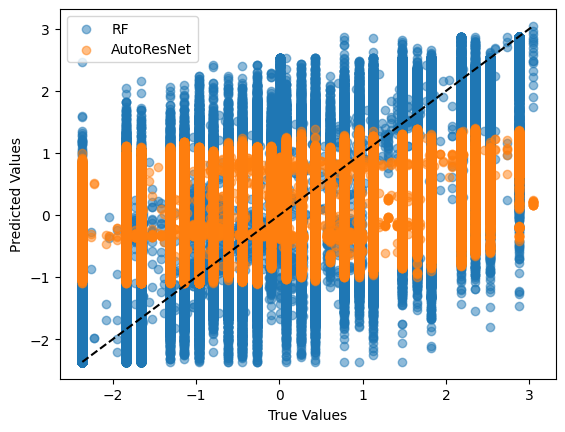

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, rf_pred_test, label='RF', alpha=0.5)
plt.scatter(y_test, auto_resnet_pred_test, label='AutoResNet', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 4. Visualization of Model Performance
This step adds visualizations to compare the original MAIAC AOD, Random Forest imputed AOD, and AutoResnet imputed AOD. It includes spatial maps, scatter plots, and a training loss curve for AutoResnet, as requested by your professor.



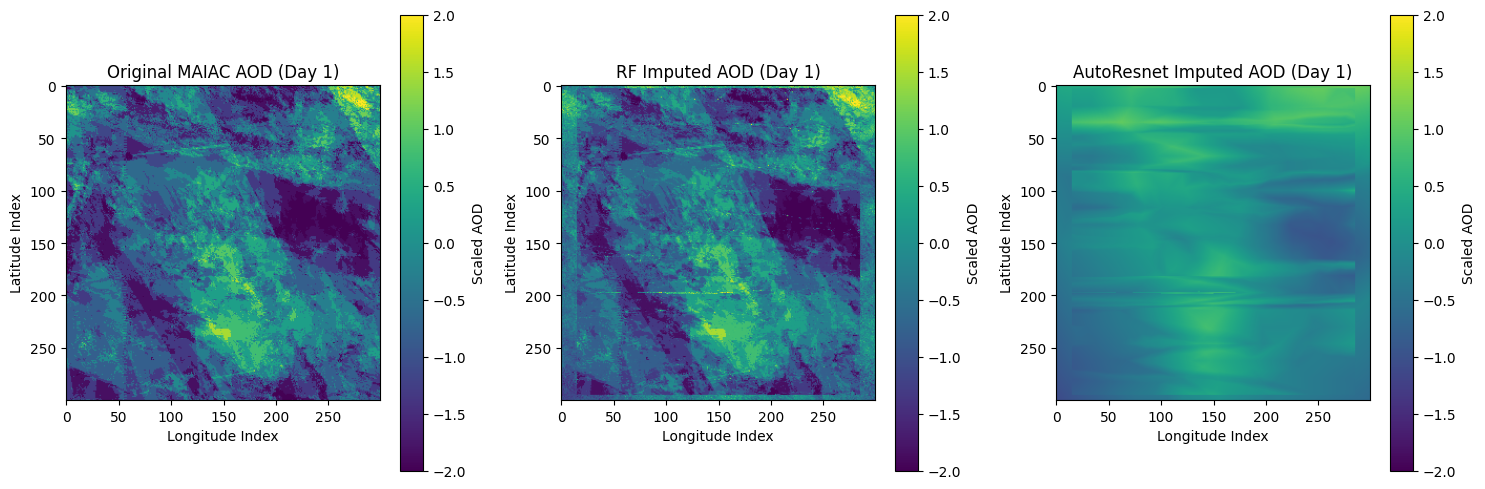

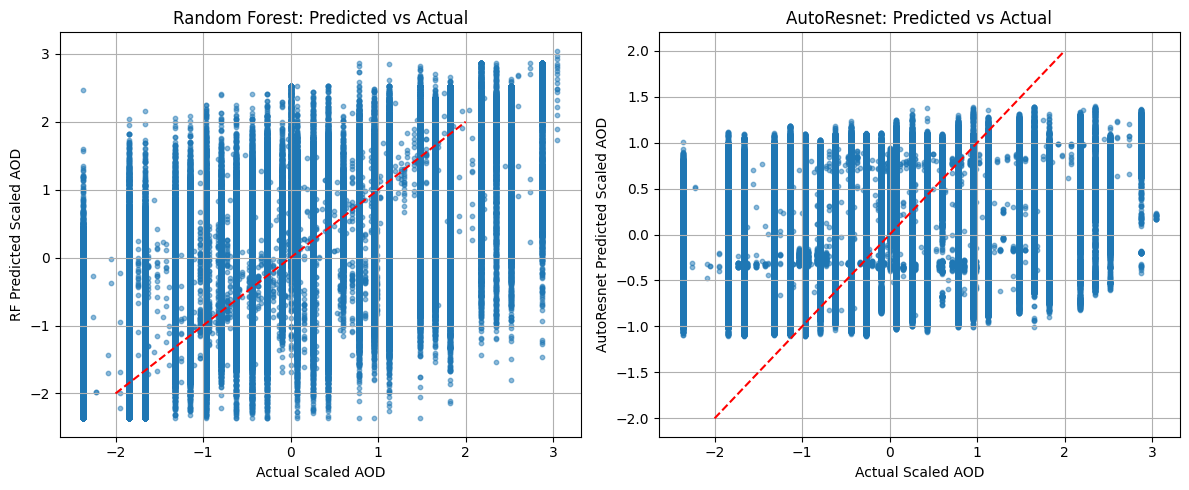

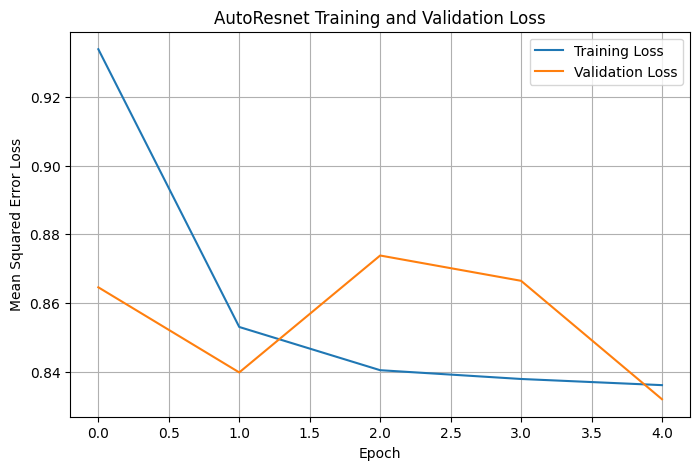

In [ ]:
# Visualization 1: Spatial Maps of AOD (Original, RF Imputed, AutoResnet Imputed)
# Select a single day for visualization (e.g., day 0)
day_idx = 0

plt.figure(figsize=(15, 5))

# Original MAIAC AOD
plt.subplot(1, 3, 1)
plt.imshow(aod_maiac_scaled[day_idx], cmap='viridis', vmin=-2, vmax=2)
plt.colorbar(label='Scaled AOD')
plt.title(f"Original MAIAC AOD (Day {day_idx + 1})")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")

# Random Forest Imputed AOD
plt.subplot(1, 3, 2)
plt.imshow(initial_imputed[day_idx], cmap='viridis', vmin=-2, vmax=2)
plt.colorbar(label='Scaled AOD')
plt.title(f"RF Imputed AOD (Day {day_idx + 1})")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")

# AutoResnet Imputed AOD
plt.subplot(1, 3, 3)
plt.imshow(final_imputed[day_idx], cmap='viridis', vmin=-2, vmax=2)
plt.colorbar(label='Scaled AOD')
plt.title(f"AutoResnet Imputed AOD (Day {day_idx + 1})")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")

plt.tight_layout()
plt.show()

# Visualization 2: Scatter Plots of Predicted vs Actual AOD (Test Set)
plt.figure(figsize=(12, 5))

# Random Forest Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred_test, alpha=0.5, s=10)
plt.plot([-2, 2], [-2, 2], 'r--')  # 1:1 line
plt.xlabel("Actual Scaled AOD")
plt.ylabel("RF Predicted Scaled AOD")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# AutoResnet Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, auto_resnet_pred_test, alpha=0.5, s=10)
plt.plot([-2, 2], [-2, 2], 'r--')  # 1:1 line
plt.xlabel("Actual Scaled AOD")
plt.ylabel("AutoResnet Predicted Scaled AOD")
plt.title("AutoResnet: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualization 3: Training Loss Curve for AutoResnet
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error Loss")
plt.title("AutoResnet Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

## 5. Temporal Analysis Visualization
This step adds a temporal analysis to show how AOD varies over the 7 days in the dataset, comparing the original, RF-imputed, and AutoResnet-imputed AOD. This aligns with the paper's focus on spatiotemporal imputation.

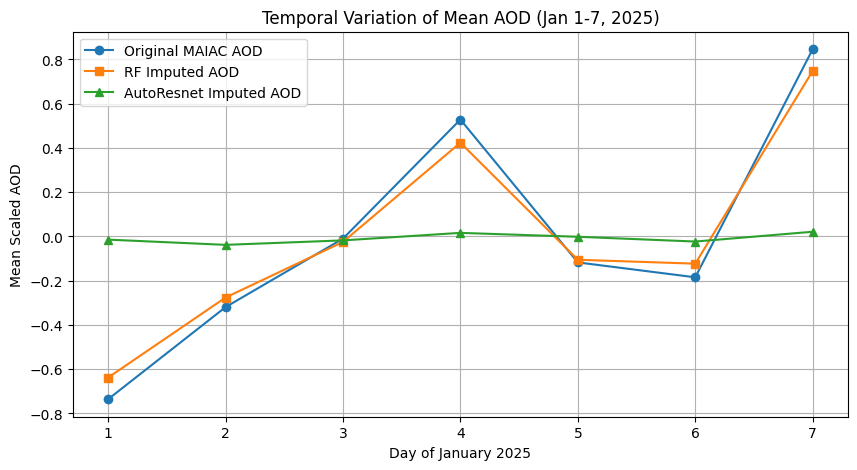

In [ ]:
# Temporal Analysis: Mean AOD over time (7 days)
mean_aod_maiac = np.nanmean(aod_maiac_scaled, axis=(1, 2))
mean_aod_rf = np.nanmean(initial_imputed, axis=(1, 2))
mean_aod_auto_resnet = np.nanmean(final_imputed, axis=(1, 2))

# Plot temporal trends
plt.figure(figsize=(10, 5))
days = np.arange(1, 8)

plt.plot(days, mean_aod_maiac, label='Original MAIAC AOD', marker='o')
plt.plot(days, mean_aod_rf, label='RF Imputed AOD', marker='s')
plt.plot(days, mean_aod_auto_resnet, label='AutoResnet Imputed AOD', marker='^')

plt.xlabel("Day of January 2025")
plt.ylabel("Mean Scaled AOD")
plt.title("Temporal Variation of Mean AOD (Jan 1-7, 2025)")
plt.legend()
plt.grid(True)
plt.show()

## 6. Residual Analysis Visualization
This step visualizes the residuals (errors) between the predicted and actual AOD values to identify systematic biases or patterns, which can provide insights into model performance.

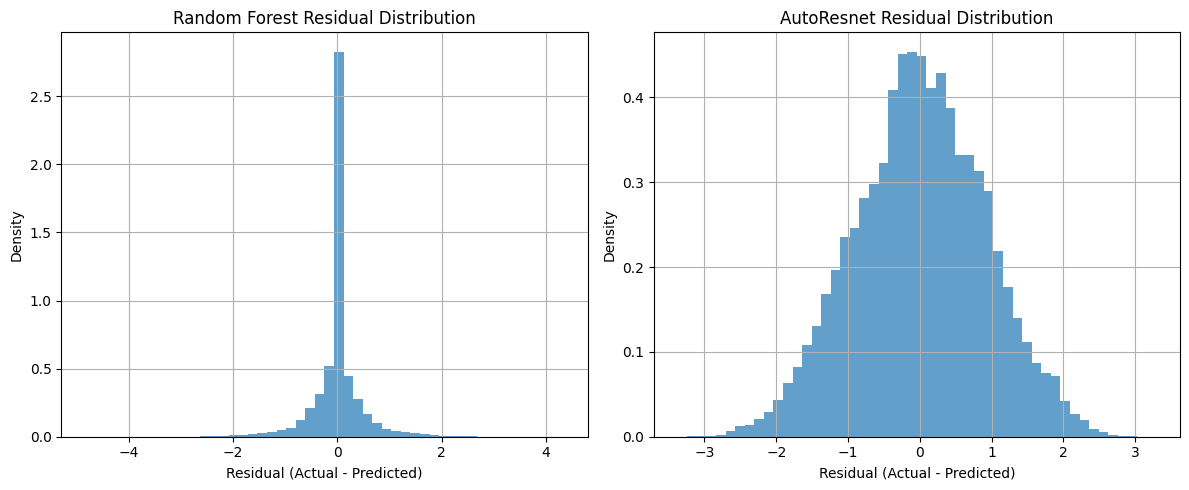

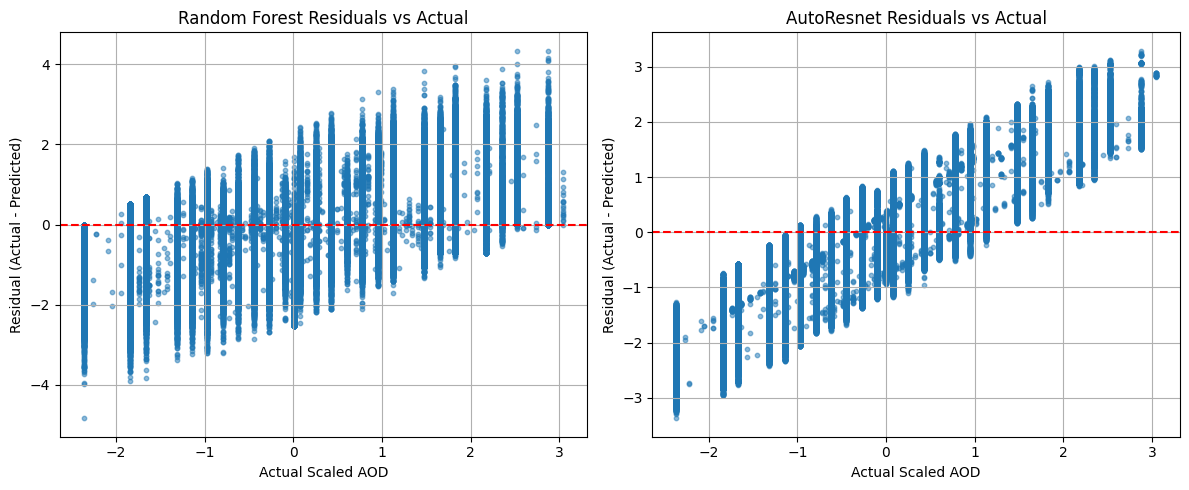

In [ ]:
# Residual Analysis: Compute residuals for Random Forest and AutoResnet
rf_residuals = y_test - rf_pred_test
auto_resnet_residuals = y_test - auto_resnet_pred_test

# Plot residual distributions
plt.figure(figsize=(12, 5))

# Random Forest Residuals
plt.subplot(1, 2, 1)
plt.hist(rf_residuals, bins=50, density=True, alpha=0.7)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Density")
plt.title("Random Forest Residual Distribution")
plt.grid(True)

# AutoResnet Residuals
plt.subplot(1, 2, 2)
plt.hist(auto_resnet_residuals, bins=50, density=True, alpha=0.7)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Density")
plt.title("AutoResnet Residual Distribution")
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot of residuals vs actual values
plt.figure(figsize=(12, 5))

# Random Forest Residuals vs Actual
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_residuals, alpha=0.5, s=10)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual Scaled AOD")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Random Forest Residuals vs Actual")
plt.grid(True)

# AutoResnet Residuals vs Actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, auto_resnet_residuals, alpha=0.5, s=10)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Actual Scaled AOD")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("AutoResnet Residuals vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Saving the results


In [ ]:
import numpy as np

# Save imputed AOD data
np.save("initial_imputed_rf.npy", initial_imputed)
np.save("final_imputed_auto_resnet.npy", final_imputed)

# Save evaluation metrics to a text file
with open("evaluation_metrics.txt", "w") as f:
    f.write("Random Forest Performance on Test Set:\n")
    f.write(f"R²: {rf_r2:.3f}\n")
    f.write(f"RMSE: {rf_rmse:.3f}\n")
    f.write(f"MAE: {rf_mae:.3f}\n")
    f.write(f"Accuracy (within ±0.1): {rf_accuracy:.2f}%\n\n")
    f.write("AutoResnet Performance on Test Set:\n")
    f.write(f"R²: {auto_resnet_r2:.3f}\n")
    f.write(f"RMSE: {auto_resnet_rmse:.3f}\n")
    f.write(f"MAE: {auto_resnet_mae:.3f}\n")
    f.write(f"Accuracy (within ±0.1): {auto_resnet_accuracy:.2f}%\n\n")
    # f.write("Simulated SONET Validation for Random Forest:\n")
    # f.write(f"R²: {sonet_rf_r2:.3f}\n")
    # f.write(f"RMSE: {sonet_rf_rmse:.3f}\n")
    # f.write(f"MAE: {sonet_rf_mae:.3f}\n\n")
    # f.write("Simulated SONET Validation for AutoResnet:\n")
    # f.write(f"R²: {sonet_auto_resnet_r2:.3f}\n")
    # f.write(f"RMSE: {sonet_auto_resnet_rmse:.3f}\n")
    # f.write(f"MAE: {sonet_auto_resnet_mae:.3f}\n")

print("Evaluation metrics and imputed data saved successfully.")

Evaluation metrics and imputed data saved successfully.
